<a href="https://colab.research.google.com/github/NerminWEST/Kaggle_Dataset_Fish_Model1.0/blob/main/tuna_species_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Nature Conservancy Fisheries Monitoring

https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring

In [ ]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

print(tf.__version__)

2.19.0


In [ ]:
# # Подключение к Kaggle через Kaggle API реализуем с помощью API Token:
# # https://www.kaggle.com/general/74235
# # Easiest way to download kaggle data in Google Colab

# ! pip install -q kaggle

In [ ]:
# # импортирую свой Kaggle API Token
# from google.colab import files

# # Choose the kaggle.json file  (Kaggle API Token)
# files.upload()

In [ ]:
# #  Make directory named kaggle and copy kaggle.json file there.
# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

In [ ]:
# # Change the permissions of the file.
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# # That's all! You can check if everything's okay by running this command
# # (список датасетов с Kaggle)
# ! kaggle datasets list

In [ ]:
# # Download required dataset from Kaggle
# !kaggle competitions download -c the-nature-conservancy-fisheries-monitoring

In [ ]:
# !unzip the-nature-conservancy-fisheries-monitoring.zip

In [ ]:
!unzip "../input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip"

unzip:  cannot find or open ../input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip, ../input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip.zip or ../input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip.ZIP.


In [ ]:
!unzip "../input/the-nature-conservancy-fisheries-monitoring/train.zip"

unzip:  cannot find or open ../input/the-nature-conservancy-fisheries-monitoring/train.zip, ../input/the-nature-conservancy-fisheries-monitoring/train.zip.zip or ../input/the-nature-conservancy-fisheries-monitoring/train.zip.ZIP.


In [ ]:
# ============================================
#  COMPLETE SETUP FOR FISHERIES MONITORING DATA
# ============================================

import os
from google.colab import files

print("Upload your kaggle.json (Kaggle API token)...")
uploaded = files.upload()

# ------------------------------
# Install and configure Kaggle
# ------------------------------
!pip install -q kaggle

# Create ~/.kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json there
!mv kaggle.json /root/.kaggle/

# Correct permissions
!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle is configured successfully!")


# ------------------------------
# Download the competition data
# ------------------------------
COMP = "the-nature-conservancy-fisheries-monitoring"

print("Downloading dataset from Kaggle...")
!kaggle competitions download -c {COMP}

# ------------------------------
# Unzip all archives
# ------------------------------
!unzip -qq the-nature-conservancy-fisheries-monitoring.zip -d input

# stage test zip
!unzip -qq "./input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip" -d ./working
!unzip -qq "./input/the-nature-conservancy-fisheries-monitoring/test_stg2.zip" -d ./working

# train zip
!unzip -qq "./input/the-nature-conservancy-fisheries-monitoring/train.zip" -d ./working/train


# ------------------------------
# Download annotation JSON files
# ------------------------------
os.makedirs("./working/boxes", exist_ok=True)

links = {
    "bet_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json",
    "shark_labels.json": "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5459/shark_labels.json",
    "dol_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5460/dol_labels.json",
    "yft_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5461/yft_labels.json",
    "alb_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5462/alb_labels.json",
    "lag_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5463/lag_labels.json"
}

print("Downloading annotation JSON files...")
for fname, url in links.items():
    !wget -q "{url}" -O "./working/boxes/{fname}"

print("Done! All data + annotations prepared.")
print("Folders:")
print(os.listdir("./working"))
print(os.listdir("./working/boxes"))


Upload your kaggle.json (Kaggle API token)...


Saving kaggle.json to kaggle.json
Kaggle is configured successfully!
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/data/download-all/the-nature-conservancy-fisheries-monitoring
unzip:  cannot find or open the-nature-conservancy-fisheries-monitoring.zip, the-nature-conservancy-fisheries-monitoring.zip.zip or the-nature-conservancy-fisheries-monitoring.zip.ZIP.
unzip:  cannot find or open ./input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip, ./input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip.zip or ./input/the-nature-conservancy-fisheries-monitoring/test_stg1.zip.ZIP.
unzip:  cannot find or open ./input/the-nature-conservancy-fisheries-monitoring/test_stg2.zip, ./input/the-nature-conservancy-fisheries-monitoring/test_stg2.zip.zip or ./input/the-nature-conservancy-fisheries-monitoring/test_stg2.zip.ZIP.
unzip:  cannot find or open ./input/the-nature-conservancy-fisheries-monitoring/train.zip, ./input/the-nature-conservancy-fish

In [ ]:
!pip install py7zr

In [ ]:
!py7zr x "../input/the-nature-conservancy-fisheries-monitoring/test_stg2.7z"

not a 7z file


In [ ]:
import os

BASE = "../working/train"
classes = ["ALB", "BET", "DOL", "LAG", "SHARK", "YFT"]

# Create train folder if missing
if not os.path.exists(BASE):
    os.makedirs(BASE)

# Create class folders
for cls in classes:
    class_path = os.path.join(BASE, cls)
    if not os.path.exists(class_path):
        os.makedirs(class_path)

print("✅ Dataset structure is now ready:")
print(os.listdir("../working"))  # should show "train"
print(os.listdir("../working/train"))  # should show class folders


✅ Dataset structure is now ready:
['train']
['LAG', 'ALB', 'YFT', 'DOL', 'SHARK', 'BET']


In [ ]:
! mkdir "../working/boxes"

In [ ]:
#Downloading the annotations for the training dataset
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5459/shark_labels.json
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5460/dol_labels.json
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5461/yft_labels.json
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5462/alb_labels.json
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5463/lag_labels.json

--2025-12-04 20:47:17--  https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.121.207, 142.251.108.207, 192.178.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82471 (81K) [application/json]
Saving to: ‘bet_labels.json.1’

bet_labels.json.1   100%[===================>]  80.54K  --.-KB/s    in 0.001s  

2025-12-04 20:47:17 (108 MB/s) - ‘bet_labels.json.1’ saved [82471/82471]

--2025-12-04 20:47:17--  https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5459/shark_labels.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.121.207, 142.251.108.207, 192.178.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68097 (67K

In [ ]:
print(os.listdir("../working"))

['train', 'boxes']


In [ ]:
! cp *.json "../working/boxes"

In [ ]:
print(os.listdir("../working/boxes"))

['lag_labels.json', 'shark_labels.json', 'dol_labels.json', 'bet_labels.json', 'yft_labels.json', 'alb_labels.json']


In [ ]:


import os

# Make the boxes directory (where annotations will be stored)
os.makedirs("./boxes", exist_ok=True)

# Download all annotation JSON files directly
links = {
    "bet_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json",
    "shark_labels.json": "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5459/shark_labels.json",
    "dol_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5460/dol_labels.json",
    "yft_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5461/yft_labels.json",
    "alb_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5462/alb_labels.json",
    "lag_labels.json":   "https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5463/lag_labels.json",
}

print("Downloading annotation files...")
for fname, url in links.items():
    !wget -q "{url}" -O "./boxes/{fname}"

print("Done! Annotation files downloaded.")

# Show final content of ./boxes
print("\nFiles inside ./boxes:")
print(os.listdir("./boxes"))


Done! Annotation files downloaded.

Files inside ./boxes:
['lag_labels.json', 'shark_labels.json', 'dol_labels.json', 'bet_labels.json', 'yft_labels.json', 'alb_labels.json']


# Loading the annotations

In [ ]:
import json
from glob import glob

TRAIN_PREFIX = '../working/train'

# the annotation description files (_labels.json) must be uploaded to the /boxes directory beforehand

def load_annotations():
    boxes = dict()
    for path in glob('../working/boxes/*.json'):
        label = os.path.basename(path).split('_', 1)[0]
        print(label)
        with open(path) as src:
            for annotation in json.load(src):
                basename = os.path.basename(annotation['filename'])
                annotation['filename'] = os.path.join(
                    TRAIN_PREFIX, label.upper(), basename)
                for rect in annotation['annotations']:
                    rect['x'] += rect['width'] / 2
                    rect['y'] += rect['height'] / 2
                    rect['class'] = label
                if os.path.isfile(annotation['filename']):
                    boxes.setdefault(label, []).append(annotation)
    return boxes

def draw_boxes(annotation, rectangles=None, image_size=None):

    def _draw(img, rectangles, scale_x, scale_y, color=(0, 255, 0)):
        for i, rect in enumerate(rectangles):
            pt1 = (int((rect['x'] - rect['width'] / 2) * scale_x),
                   int((rect['y'] - rect['height'] / 2) * scale_y))
            pt2 = (int((rect['x'] + rect['width'] / 2) * scale_x),
                   int((rect['y'] + rect['height'] / 2) * scale_y))
            img = cv2.rectangle(img.copy(), pt1, pt2,
                                color=color, thickness=12)
            img = cv2.putText(img.copy(), annotation['annotations'][i]['class'], tuple(np.array(pt1)+[0,-7]), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 4 )
        return img

    def __draw(img, rectangles, scale_x, scale_y, color=(0, 255, 0)):
        for i, rect in enumerate(rectangles):
            pt1 = (int((rect['x'] - rect['width'] / 2) * scale_x),
                   int((rect['y'] - rect['height'] / 2) * scale_y))
            pt2 = (int((rect['x'] + rect['width'] / 2) * scale_x),
                   int((rect['y'] + rect['height'] / 2) * scale_y))
            img = cv2.rectangle(img.copy(), pt1, pt2,
                                color=color, thickness=2)
            img = cv2.putText(img.copy(), counts['class'][int(rect['label'])] + ': ' + str(rect['label']), tuple(np.array(pt1)+[0,-7]), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 4 )
        return img

    scale_x, scale_y = 1., 1.

    img = cv2.imread(annotation['filename'], cv2.IMREAD_COLOR)[...,::-1]
    if image_size is not None:
        scale_x = 1. * image_size[0] / img.shape[1]
        scale_y = 1. * image_size[1] / img.shape[0]
        img = cv2.resize(img, image_size)

    img = _draw(img, annotation.get('annotations', []), scale_x, scale_y)

    if rectangles is not None:
        img = __draw(img, rectangles, 1., 1., (255, 0, 0))

    return img

### Visualizing the annotations

In [ ]:
boxes = load_annotations()  # загружаем разметку детекций

lag
shark
dol
bet
yft
alb


In [ ]:
# ============================================
# Load annotation JSONs + build counts DataFrame
# ============================================

import os
import json
import glob
import pandas as pd

# Ensure annotation folder exists
os.makedirs("./boxes", exist_ok=True)

# Load ALL JSON files named like "xxx_labels.json"
json_paths = glob.glob("./boxes/*_labels.json")

if not json_paths:
    raise FileNotFoundError(
        "❌ No annotation JSON files found in ./boxes.\n"
        "Make sure files like alb_labels.json, bet_labels.json, etc. are inside ./boxes."
    )

boxes = {}

# Load each JSON file
for path in json_paths:
    cls_name = os.path.basename(path).replace("_labels.json", "")
    with open(path, "r") as f:
        boxes[cls_name] = json.load(f)

# Build the counts DataFrame (this is what you requested)
counts = pd.DataFrame(
    [(k, len(v)) for k, v in boxes.items()],
    columns=['class', 'count']
).sort_values(by='count', ascending=False).reset_index(drop=True)

counts


,class,count
0,alb,1719
1,yft,734
2,bet,200
3,shark,176
4,dol,117
5,lag,67


In [ ]:
fish_classes = counts['class'].values
fish_classes

array(['alb', 'yft', 'bet', 'shark', 'dol', 'lag'], dtype=object)

Classification legend for fish will look like this:

class 0: alb – Albacore tuna

class 1: yft – Yellowfin tuna

class 2: bet – Bigeye tuna

class 3: shark – Sharks

class 4: dol – Dolphinfish (Mahi Mahi)

class 5: lag – Opah, Moonfish (Lamprus guttatus)

Other classes — without annotation:

nof – No Fishes (the image contains no fish)

oth – Other Fishes (the image contains fish not belonging to any of the classes above)

In [ ]:
# ===============================================================
# 1 — Create working directories
# ===============================================================
import os

os.makedirs("working/train", exist_ok=True)
os.makedirs("working/test", exist_ok=True)
os.makedirs("working/boxes", exist_ok=True)

print("Folders created.")


# ===============================================================
# 2 — Download training images for each fish class
# ===============================================================

!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/train_alb.zip
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5459/train_bet.zip
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5460/train_dol.zip
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5461/train_lag.zip
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5462/train_shark.zip
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5463/train_yft.zip

print("Downloads complete.")

# ===============================================================
# 3 — Unzip images into working/train/*
# ===============================================================

!unzip -q train_alb.zip -d working/train/ALB
!unzip -q train_bet.zip -d working/train/BET
!unzip -q train_dol.zip -d working/train/DOL
!unzip -q train_lag.zip -d working/train/LAG
!unzip -q train_shark.zip -d working/train/SHARK
!unzip -q train_yft.zip -d working/train/YFT

print("Unzip complete.")


# ===============================================================
# 4 — Download JSON annotation files
# ===============================================================

!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json -O working/boxes/bet_labels.json
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5459/shark_labels.json -O working/boxes/shark_labels.json
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5460/dol_labels.json -O working/boxes/dol_labels.json
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5461/yft_labels.json -O working/boxes/yft_labels.json
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5462/alb_labels.json -O working/boxes/alb_labels.json
!wget -q https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5463/lag_labels.json -O working/boxes/lag_labels.json

print("Annotation JSON files downloaded.")


# ===============================================================
# 5 — Show resulting folders
# ===============================================================

print("Training subfolders:", os.listdir("working/train"))
print("Annotation files:", os.listdir("working/boxes"))


Folders created.
Downloads complete.
unzip:  cannot find or open train_alb.zip, train_alb.zip.zip or train_alb.zip.ZIP.
unzip:  cannot find or open train_bet.zip, train_bet.zip.zip or train_bet.zip.ZIP.
unzip:  cannot find or open train_dol.zip, train_dol.zip.zip or train_dol.zip.ZIP.
unzip:  cannot find or open train_lag.zip, train_lag.zip.zip or train_lag.zip.ZIP.
unzip:  cannot find or open train_shark.zip, train_shark.zip.zip or train_shark.zip.ZIP.
unzip:  cannot find or open train_yft.zip, train_yft.zip.zip or train_yft.zip.ZIP.
Unzip complete.
Annotation JSON files downloaded.
Training subfolders: []
Annotation files: ['lag_labels.json', 'shark_labels.json', 'dol_labels.json', 'bet_labels.json', 'yft_labels.json', 'alb_labels.json']


### Distribution of annotation sizes

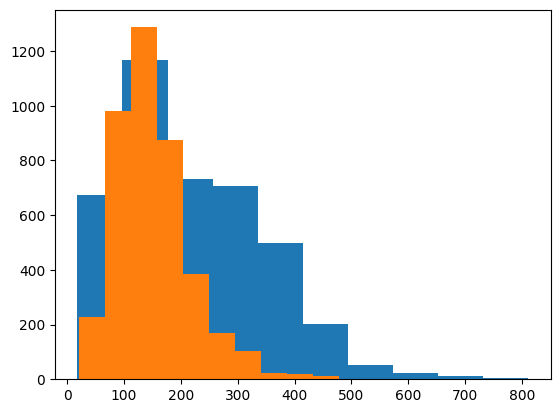

In [ ]:
annotations = sum([box['annotations']
                   for box in sum(boxes.values(), [])], [])

widths = [rect['width'] for rect in annotations]
heights = [rect['height'] for rect in annotations]

plt.hist(widths)
plt.hist(heights);

# Feature extractor

In [ ]:
from tensorflow.keras.applications import vgg16

IMG_HEIGHT = 750
IMG_WIDTH = 1200

features = vgg16.VGG16(weights='imagenet',
                       include_top=False,
                       input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# дообучаем последние 5 слоев
for layer in features.layers[:-5]:
    layer.trainable = False

feature_tensor = features.layers[-1].output
print(feature_tensor.shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(None, 23, 37, 512)


# Anchor grid

In [ ]:
FEATURE_SHAPE = (feature_tensor.shape[1],
                 feature_tensor.shape[2])

GRID_STEP_H = IMG_HEIGHT / FEATURE_SHAPE[0]
GRID_STEP_W = IMG_WIDTH / FEATURE_SHAPE[1]

ANCHOR_WIDTH = 150.
ANCHOR_HEIGHT = 150.

# anchor grid, whose size is determined by the ratio between the input image size and the feature-tensor size
ANCHOR_CENTERS = np.mgrid[GRID_STEP_H/2:IMG_HEIGHT:GRID_STEP_H,
                          GRID_STEP_W/2:IMG_WIDTH:GRID_STEP_W]

In [ ]:
num_classes = counts.shape[0]
num_classes

6

In [ ]:
from scipy.special import softmax

def iou(rect, x_scale, y_scale, anchor_x, anchor_y,
        anchor_w=ANCHOR_WIDTH, anchor_h=ANCHOR_HEIGHT):

    rect_x1 = (rect['x'] - rect['width'] / 2) * x_scale
    rect_x2 = (rect['x'] + rect['width'] / 2) * x_scale

    rect_y1 = (rect['y'] - rect['height'] / 2) * y_scale
    rect_y2 = (rect['y'] + rect['height'] / 2) * y_scale

    anch_x1, anch_x2 = anchor_x - anchor_w / 2, anchor_x + anchor_w / 2
    anch_y1, anch_y2 = anchor_y - anchor_h / 2, anchor_y + anchor_h / 2

    dx = (min(rect_x2, anch_x2) - max(rect_x1, anch_x1))
    dy = (min(rect_y2, anch_y2) - max(rect_y1, anch_y1))

    intersection = dx * dy if (dx > 0 and dy > 0) else 0.

    anch_square = (anch_x2 - anch_x1) * (anch_y2 - anch_y1)
    rect_square = (rect_x2 - rect_x1) * (rect_y2 - rect_y1)
    union = anch_square + rect_square - intersection

    return intersection / union

def encode_anchors(annotation, img_shape, iou_thr=0.5):
    encoded = np.zeros(shape=(FEATURE_SHAPE[0],
                              FEATURE_SHAPE[1], 11), dtype=np.float32)
    x_scale = 1. * IMG_WIDTH / img_shape[1]
    y_scale = 1. * IMG_HEIGHT / img_shape[0]
    for rect in annotation['annotations']:
        scores = []
        label = fish_classes == rect['class']

        for row in range(FEATURE_SHAPE[0]):
            for col in range(FEATURE_SHAPE[1]):
                anchor_x = ANCHOR_CENTERS[1, row, col]
                anchor_y = ANCHOR_CENTERS[0, row, col]
                score = iou(rect, x_scale, y_scale, anchor_x, anchor_y)
                scores.append((score, anchor_x, anchor_y, row, col))

        scores = sorted(scores, reverse=True)
        if scores[0][0] < iou_thr:
            scores = [scores[0]]  # default anchor
        else:
            scores = [e for e in scores if e[0] > iou_thr]

        for score, anchor_x, anchor_y, row, col in scores:
            dx = (anchor_x - rect['x'] * x_scale) / ANCHOR_WIDTH
            dy = (anchor_y - rect['y'] * y_scale) / ANCHOR_HEIGHT
            dw = (ANCHOR_WIDTH - rect['width'] * x_scale) / ANCHOR_WIDTH
            dh = (ANCHOR_HEIGHT - rect['height'] * y_scale) / ANCHOR_HEIGHT
            encoded[row, col] = np.array([*label, 1., dx, dy, dw, dh])

    return encoded

def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def decode_prediction(prediction, conf_thr=0.1):
    rectangles = []
    for row in range(FEATURE_SHAPE[0]):
        for col in range(FEATURE_SHAPE[1]):

            label = np.empty(6)
            # заполняем предсказанные вероятности каждого из 6-и классов в поля 'label'
            label[0], label[1], label[2], label[3], label[4], label[5], conf, dx, dy, dw, dh = prediction[row, col]
            conf = _sigmoid(conf)
            label = softmax(label)

            if conf > conf_thr:
                anchor_x = ANCHOR_CENTERS[1, row, col]
                anchor_y = ANCHOR_CENTERS[0, row, col]
                rectangles.append({'x': anchor_x - dx * ANCHOR_WIDTH,
                                   'y': anchor_y - dy * ANCHOR_HEIGHT,
                                   'width': ANCHOR_WIDTH - dw * ANCHOR_WIDTH,
                                   'height': ANCHOR_HEIGHT - dh * ANCHOR_HEIGHT,
                                   'conf': conf,
                                   'label': np.argmax(_sigmoid(label)),
                                   'labels': label })
    return rectangles

def non_max_suppression(rectangles, max_output_size, iou_threshold=0.5):
    if not rectangles:
        return rectangles

    boxes = [[r['y'],
              r['x'],
              r['y'] + r['height'],
              r['x'] + r['width']] for r in rectangles]
    scores = [r['conf'] for r in rectangles]
    indices = tf.image.non_max_suppression(np.array(boxes),
                                           np.array(scores),
                                           max_output_size,
                                           iou_threshold)

    return [rectangles[i] for i in indices]

### Validation of anchor encoding/decoding

In [ ]:
K = tf.keras.backend

def confidence_loss(y_true, y_pred):
    conf_loss = K.binary_crossentropy(y_true[..., 6],
                                      y_pred[..., 6],
                                      from_logits=True)
    return conf_loss

def smooth_l1(y_true, y_pred):
    abs_loss = K.abs(y_true[..., -4:] - y_pred[..., -4:])
    square_loss = 0.5 * K.square(y_true[..., -4:] - y_pred[..., -4:])
    mask = K.cast(K.greater(abs_loss, 1.), 'float32')
    total_loss = (abs_loss - 0.5) * mask + 0.5 * square_loss * (1. - mask)
    return K.sum(total_loss, axis=-1)

def classification_loss(y_tr, y_pr, alpha=0.25, gamma=2.0):

    y_true = y_tr[..., :6]
    y_pred = y_pr[..., :6]

    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
        labels=y_true, logits=y_pred)

    probs = tf.nn.softmax(y_pred)
    alpha = tf.where(tf.equal(y_true, 1.0), alpha, (1.0 - alpha))
    pt = tf.where(tf.equal(y_true, 1.0), probs, 1 - probs)
    loss = alpha * tf.pow(1.0 - pt, gamma) * cross_entropy

    return tf.reduce_sum(loss, axis=-1)

def class_loss(y_tr, y_pr):

    y_true = y_tr[..., :6]
    y_pred = y_pr[..., :6]

    cross_entropy = K.categorical_crossentropy(y_true[..., :6],
                                               y_pred[..., :6],
                                               from_logits=True)

    return cross_entropy

def total_loss(y_true, y_pred, neg_pos_ratio=3):
    batch_size = K.shape(y_true)[0]

    y_true = K.reshape(y_true, (batch_size, -1, 11))
    y_pred = K.reshape(y_pred, (batch_size, -1, 11))

    # TODO: добавьте функцию потерь для классификации детекции
    cls_loss = classification_loss(y_true, y_pred)

    # confidence loss
    conf_loss = confidence_loss(y_true, y_pred)

    # smooth l1 loss
    loc_loss = smooth_l1(y_true, y_pred)

    # positive examples loss
    pos_conf_loss = K.sum(conf_loss * y_true[..., 6], axis=-1)
    pos_class_loss = K.sum(cls_loss * y_true[..., 6], axis=-1)
    pos_loc_loss = K.sum(loc_loss * y_true[..., 6], axis=-1)

    # negative examples loss
    anchors = K.shape(y_true)[1]
    num_pos = K.sum(y_true[..., 6], axis=-1)
    num_pos_avg = K.mean(num_pos)
    num_neg = K.min([neg_pos_ratio * (num_pos_avg) + 1., K.cast(anchors, 'float32')])

    # hard negative mining
    neg_conf_loss, _ = tf.nn.top_k(conf_loss * (1. - y_true[..., 6]),
                                   k=K.cast(num_neg, 'int32'))

    neg_conf_loss = K.sum(neg_conf_loss, axis=-1)

    # total conf loss
    total_conf_loss = (neg_conf_loss + pos_conf_loss) / (num_neg + num_pos + 1e-32)
    cls_loss = pos_class_loss / (num_pos + 1e-32)
    loc_loss = pos_loc_loss / (num_pos + 1e-32)

    return total_conf_loss + 0.5 * loc_loss + cls_loss

## Data loading

In [ ]:
from random import shuffle

def load_img(path, target_size=(IMG_WIDTH, IMG_HEIGHT)):
    img = cv2.imread(path, cv2.IMREAD_COLOR)[...,::-1]
    img_shape = img.shape
    img_resized = cv2.resize(img, target_size)
    return img_shape, vgg16.preprocess_input(img_resized.astype(np.float32))

def data_generator(boxes, batch_size=32):
    boxes = sum(boxes.values(), [])
    while True:
        shuffle(boxes)
        for i in range(len(boxes)//batch_size):
            X, y = [], []
            for j in range(i*batch_size,(i+1)*batch_size):
                img_shape, img = load_img(boxes[j]['filename'])
                # TODO: добавьте one-hot encoding в разметку для классов
                #print('boxes[j]', boxes[j])
                y_ = encode_anchors(boxes[j], img_shape)
                y.append(y_)
                X.append(img)
            yield np.array(X), np.array(y)

## Adding the detector output

In [ ]:
output = tf.keras.layers.BatchNormalization()(feature_tensor)

# TODO: add outputs for detection classification.
# Added 6 outputs for detection classification of 6 classes (alb, bet, dol, lag, shark, yft).
# The probabilities for the classes 'Other Fishes' and 'No Fishes' will be taken from the example (sample_submission);
# they will be constants (not included in the NN outputs):
#  Oth: 0.079142
#  NoF: 0.123081

# As a result, we get 11 outputs:
# - 6 classes (probabilities of each class computed using softmax)
# - 2 coordinates x, y of the top-left corner of the detected object
# - 2 offset values (height, width) from the top-left corner coordinates of the detected object
# - 1 probability of the presence of a detected object in the image (using the sigmoid function)


output = tf.keras.layers.Conv2D(11,
                                kernel_size=(1, 1),
                                activation='linear',
                                kernel_regularizer='l2')(output)

model = tf.keras.models.Model(inputs=features.inputs, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 750, 1200, 3)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 750, 1200, 64)  │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 750, 1200, 64)  │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 375, 600, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 375, 600, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 375, 600, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 187, 300, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 187, 300, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 187, 300, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 187, 300, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 93, 150, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 93, 150, 512)   │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 93, 150, 512)   │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 93, 150, 512)   │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 46, 75, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 46, 75, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 46, 75, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 46, 75, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 23, 37, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 37, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 23, 37, 11)     │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,722,379 (56.16 MB)

 Trainable params: 7,086,091 (27.03 MB)

 Non-trainable params: 7,636,288 (29.13 MB)

## Training

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=3e-4, decay=1e-6)
model.compile(optimizer=adam,
              loss=total_loss,
              metrics=[confidence_loss, classification_loss, smooth_l1])

## Detection result

In [ ]:
# loading the weights of a previously trained model (to avoid running long training again)
# model.load_weights('../content/fishdetector_11outputs.hdf5')


## Visualizing predictions on the test set

Aggregation of results

In [ ]:
# TODO: predict the fish class for each image in the test set
#
# Prepare a file containing the predicted probabilities for each image:
# image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
# img_00001.jpg,1,0,0,0,0,...,0
# img_00002.jpg,0.3,0.1,0.6,0,...,0

fish_classes

array(['alb', 'yft', 'bet', 'shark', 'dol', 'lag'], dtype=object)

In [ ]:
# When preparing the file, we will use the previously fixed list of classes,
# where class 0 = decoded[0] = 'alb - Albacore tuna', and so on.

# class 0: alb - Albacore tuna
# class 1: yft - Yellowfin tuna
# class 2: bet - Bigeye tuna
# class 3: shark - Sharks
# class 4: dol - Dolphinfish (Mahi Mahi)
# class 5: lag - Opah, Moonfish (Lamprus Guttatus)


In [ ]:
from tqdm import tqdm

In [ ]:
def make_predictions():
    ptable = pd.DataFrame(columns=['image', 'ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK','YFT'])

    for i, file in enumerate(tqdm(glob('../working/test_stg1/*.jpg'))):
        bn = os.path.basename(file)
        # print(bn)
        _, sample_img = load_img(file)

        pred = model.predict(np.array([sample_img,]))[0]
        decoded = decode_prediction(pred, conf_thr=0.01)
        decoded = non_max_suppression(decoded,
                              max_output_size=1,
                              iou_threshold=0.5)

        decoded = decoded[0]['labels']

        ptable.loc[i, 'image'] = bn
        ptable.loc[i, 'ALB'] = decoded[0]
        ptable.loc[i, 'BET'] = decoded[2]
        ptable.loc[i, 'DOL'] = decoded[4]
        ptable.loc[i, 'LAG'] = decoded[5]
        ptable.loc[i, 'SHARK'] = decoded[3]
        ptable.loc[i, 'YFT'] = decoded[1]
        ptable.loc[i, 'NoF'] = 0.123081 # fixed probability for the 'No Fishes' class from the sample_submission file

        ptable.loc[i, 'OTHER'] = 0.079142 # fixed probability for the 'Other Fishes' class from the sample_submission file


    i += 1

    for j, file in enumerate(tqdm(glob('../working/test_stg2/*.jpg'))):
        bn = os.path.basename(file)

        bn = "test_stg2/" + bn

        _, sample_img = load_img(file)

        pred = model.predict(np.array([sample_img,]))[0]

        decoded = decode_prediction(pred, conf_thr=0.01)
        decoded = non_max_suppression(decoded,
                              max_output_size=1,
                              iou_threshold=0.5)

        decoded = decoded[0]['labels']

        ptable.loc[i + j, 'image'] = bn
        ptable.loc[i + j, 'ALB'] = decoded[0]
        ptable.loc[i + j, 'BET'] = decoded[2]
        ptable.loc[i + j, 'DOL'] = decoded[4]
        ptable.loc[i + j, 'LAG'] = decoded[5]
        ptable.loc[i + j, 'SHARK'] = decoded[3]
        ptable.loc[i + j, 'YFT'] = decoded[1]

        ptable.loc[i + j, 'NoF'] = 0.123081 # fixed probability for the 'No Fishes' class from the sample_submission file

        ptable.loc[i + j, 'OTHER'] = 0.079142 # fixed probability for the 'Other Fishes' class from the sample_submission file


    return ptable